# Backtest

In [1]:
symbol = 'ALGOUSDT'
auto_mode=True

## Drive Connection & DB

In [2]:
import pandas as pd
from google.colab import drive
import os

# Подключение к Google Drive
drive.mount('/content/drive')

# Указать путь к папке с файлами на Google Drive
shared_folder_path = '/content/drive/MyDrive/Sloping bot'

# Указать пути к файлам параметров и результатов бэктеста
params_file_path = f'{shared_folder_path}/optimized_params.csv'
results_file_path = f'{shared_folder_path}/backtest_results.csv'

# Проверка существования файла с оптимизированными параметрами
if os.path.exists(params_file_path):
    optimized_params = pd.read_csv(params_file_path)
else:
    params_columns = [
        'Symbol', 'Interval', 'Start Date', 'End Date', 'Test Return [%]',
        'window_length', 'min_space', 'sloping_atr_length', 'stop_loss_multiplier',
        'take_profit_multiplier'
    ]
    optimized_params = pd.DataFrame(columns=params_columns)

# Проверка существования файла с результатами бэктеста
if os.path.exists(results_file_path):
    backtest_results = pd.read_csv(results_file_path)
else:
    backtest_results_columns = [
        'Symbol', 'Interval', 'Start Date', 'End Date', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
        'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
        'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
        'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
        'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
        'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)',
        'window_length', 'min_space', 'sloping_atr_length', 'stop_loss_multiplier', 'take_profit_multiplier'
    ]
    backtest_results = pd.DataFrame(columns=backtest_results_columns)




Mounted at /content/drive


In [3]:
# import pandas as pd
# from google.colab import drive
# import os

# # Connect to Google Drive
# drive.mount('/content/drive')

# # Specify the path to the shared folder on Google Drive
# shared_folder_path = '/content/drive/MyDrive/Sloping bot'

# # Load existing DataFrames or create new ones
# params_file_path = f'{shared_folder_path}/optimized_params.xlsx'
# results_file_path = f'{shared_folder_path}/backtest_results.xlsx'

# # Check if the optimized parameters file exists
# if os.path.exists(params_file_path):
#     optimized_params = pd.read_excel(params_file_path)
# else:
#     params_columns = [
#         'Symbol', 'Interval', 'Start Date', 'End Date', 'Test Result',
#         'min_space', 'sloping_atr_length', 'stop_loss_multiplier',
#         'take_profit_multiplier', 'window_length'
#     ]
#     optimized_params = pd.DataFrame(columns=params_columns)

# # Check if the backtest results file exists
# if os.path.exists(results_file_path):
#     backtest_results = pd.read_excel(results_file_path)
# else:
#     backtest_results_columns = [
#         'Symbol', 'Interval', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
#         'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
#         'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
#         'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
#         'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
#         'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)'
#     ]
#     backtest_results = pd.DataFrame(columns=backtest_results_columns)


## Imports

In [4]:
!pip install pandas_ta
import pandas_ta as ta
!pip install backtesting
!pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=fd2ac3a142da9b556fb71f538137ee4024b9b1d3abd7a84eec68dc3976a81b0c
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173912 sha256=3beca800f08a9ca6de304961cdf5a501575ed415ebdbba89fb19e4d0a32ebdb5
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [5]:
# УСТАНОВКА TA-LIB В COLAB
# Устанавливаем предварительно скомпилированные файлы библиотеки TA-Lib
!pip install pandas==1.5.3
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..
!pip install ta-lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


--2024-11-04 03:57:40--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-11-04 03:57:40--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet-dal.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-11-04 03:57:40--  http://cytranet-dal.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1

In [6]:
!pip install pandas==2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [7]:
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
import os
import requests
import zipfile
import csv
import io
import backtesting
from backtesting.lib import crossover

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [8]:
# import pandas as pd

# # Создаем пустой DataFrame с для хранения данных
# columns = [
#     'Symbol', 'Interval', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
#     'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
#     'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
#     'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
#     'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
#     'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)'
# ]


# sloping_backtest_results = pd.DataFrame(columns=columns)

## Functions

### Get data and gnerate klines

In [9]:
def generate_months(start_date, end_date):
    """Генерирует список месяцев в заданном интервале."""
    start_date = datetime.strptime(start_date, '%Y-%m')
    end_date = datetime.strptime(end_date, '%Y-%m')
    months = []

    while start_date <= end_date:
        months.append(start_date.strftime('%Y-%m'))
        start_date = start_date + relativedelta(months=1)

    return months

def download_klines(symbol, interval, start_date, end_date):
    """Скачивает исторические данные свечей с Binance и возвращает DataFrame."""
    # Генерируем месяцы
    months = generate_months(start_date, end_date)

    # Создаем папки, если их нет
    if not os.path.exists('klines'):
        os.mkdir('klines')

    klines = {
        'Date': [],
        'Open': [],
        'High': [],
        'Low': [],
        'Close': [],
        'Volume': []
    }

    for month in months:
        filename = f"{symbol}-{interval}-{month}.zip"

        # Если нет klines, то скачиваем
        if not os.path.exists(f"klines/{filename}"):
            url = f"https://data.binance.vision/data/futures/um/monthly/klines/{symbol}/{interval}/{filename}"
            r = requests.get(url, allow_redirects=True)
            open(f"klines/{filename}", 'wb').write(r.content)

        # Открываем zip
        with zipfile.ZipFile(f"klines/{filename}", 'r') as zip_file:
            # Читаем csv внутри zip
            with zip_file.open(f"{symbol}-{interval}-{month}.csv", 'r') as csv_file:
                csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
                for row in csv_reader:
                    # Если строка содержит число (отбрасываем первую строку)
                    if row[0].isdigit():
                        # Заполняем списки с данными свечи
                        klines['Date'].append(datetime.fromtimestamp(int(row[0]) / 1000, tz=timezone.utc))
                        klines['Open'].append(float(row[1]))
                        klines['High'].append(float(row[2]))
                        klines['Low'].append(float(row[3]))
                        klines['Close'].append(float(row[4]))
                        klines['Volume'].append(float(row[5]))

    # Создаем DataFrame
    df = pd.DataFrame(klines)
    df['Date'] = pd.to_datetime(df['Date'])  # Конвертируем столбец 'Date' в datetime
    df.set_index('Date', inplace=True)

    return df

### Save data

In [10]:
import pandas as pd
import os
import shutil

def save_results_to_csv(df, shared_folder_path, file_name):
    csv_file_path = os.path.join(shared_folder_path, file_name)
    temp_file_path = f"{csv_file_path}.temp"

    # Проверка существования файла
    if os.path.exists(csv_file_path):
        # Загружаем текущие данные из файла
        existing_df = pd.read_csv(csv_file_path)

        # Конкатенируем текущие данные с новыми
        combined_df = pd.concat([existing_df, df], ignore_index=True)

        # Удаляем полностью дублирующиеся строки
        combined_df = combined_df.drop_duplicates(keep='first').reset_index(drop=True)
    else:
        print(f"Файл не существует, будет создан новый файл: {csv_file_path}")
        combined_df = df

    # Сохраняем обновленные данные во временный файл
    combined_df.to_csv(temp_file_path, index=False)

    # Резервное копирование старого файла перед заменой
    if os.path.exists(csv_file_path):
        backup_file_path = f"{csv_file_path}.backup"
        shutil.copy(csv_file_path, backup_file_path)
        print(f"Резервная копия создана: {backup_file_path}")

    # Перемещаем временный файл, заменяя старый файл
    os.replace(temp_file_path, csv_file_path)
    print(f"Обновленные данные сохранены в {csv_file_path}")



In [11]:
import os
import csv
import pandas as pd

# # Функция для сохранения результатов в CSV
# def save_optimized_results_to_csv(optimized_params, path):
#     optimized_params.to_csv(f'{path}/optimized_params.csv', index=False)
#     print("Results saved to CSV.")

# Из-за того, что приходится откатывать pandas для установки ta-lib, может возникать ошибка при сохранении DataFrame в CSV, для решения можно использовать данную функцию

# def save_optimized_results_to_csv(optimized_params, path, file_name):
#     csv_file_path = f'{path}/{file_name}'
#     # Use the built-in CSV library to write to the CSV file
#     with open(csv_file_path, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         # Write header
#         writer.writerow(optimized_params.columns)
#         # Write data
#         for index, row in optimized_params.iterrows():
#             writer.writerow(row)
#     print("Results saved to CSV.")


# import csv

# # Функция для сохранения параметров в CSV с использованием модуля csv
# def save_optimized_results_to_csv(optimized_params, path, file_name):
#     csv_file_path = f'{path}/{file_name}'

#     # Проверяем, существует ли файл
#     file_exists = os.path.isfile(csv_file_path)

#     # Открываем файл в режиме добавления (append), если он существует, иначе в режиме записи (write)
#     with open(csv_file_path, mode='a' if file_exists else 'w', newline='') as file:
#         writer = csv.writer(file)

#         # Записываем заголовки, если файл только что создан
#         if not file_exists:
#             writer.writerow(optimized_params.columns)

#         # Записываем строки из DataFrame
#         for index, row in optimized_params.iterrows():
#             writer.writerow(row)
#     print("Results saved to CSV.")

# Теперь вызов этой функции сохранит данные независимо от версии pandas


In [12]:
import pandas as pd
import os
import shutil

def update_csv_with_temp_backup(df, csv_file_path):
    temp_file_path = f"{csv_file_path}.temp"

    # Проверка существования файла
    if os.path.exists(csv_file_path):
        # Загружаем текущие данные из файла
        existing_df = pd.read_csv(csv_file_path)

        # Конкатенируем текущие данные с новыми
        combined_df = pd.concat([existing_df, df], ignore_index=True)

        # Удаляем полностью дублирующиеся строки
        combined_df = combined_df.drop_duplicates(keep='first').reset_index(drop=True)
    else:
        print(f"Файл не существует, будет создан новый файл: {csv_file_path}")
        combined_df = df

    # Сохраняем обновленные данные во временный файл
    combined_df.to_csv(temp_file_path, index=False)

    # Резервное копирование старого файла перед заменой
    if os.path.exists(csv_file_path):
        backup_file_path = f"{csv_file_path}.backup"
        shutil.copy(csv_file_path, backup_file_path)
        print(f"Резервная копия создана: {backup_file_path}")

    # Перемещаем временный файл, заменяя старый файл
    os.replace(temp_file_path, csv_file_path)
    print(f"Обновленные данные сохранены в {csv_file_path}")

# Пример использования функции
# Подготовка новых данных для добавления в optimized_params.csv или backtest_results.csv


In [13]:
# Функция для создания записи параметров
def create_optimized_params_row(best_params, best_loss, symbol, interval, start_date, end_date):
    return {
        'Symbol': symbol,
        'Interval': interval,
        'Start Date': start_date,
        'End Date': end_date,
        'Test Return [%]': best_loss,
        'window_length': best_params['window_length'],
        # 'min_space': best_params['min_space'],
        'sloping_atr_length': best_params['sloping_atr_length'],
        'stop_loss_multiplier': best_params['stop_loss_multiplier'],
        'take_profit_multiplier': best_params['take_profit_multiplier']
    }

### Optimization

In [14]:
from hyperopt import fmin, tpe, hp, Trials

def hyperopt_optimizer(data, symbol, interval, start_date, end_date, auto_mode=True, max_evals=5, shared_folder_path=shared_folder_path):
    global optimized_params
    auto_mode = auto_mode
    attempts = 0
    best_loss = float('inf')
    file_name = 'optimized_params.csv'


    def objective(params):
        window_length = int(params['window_length'])
        # min_space = int(params['min_space'])
        sloping_atr_length = int(params['sloping_atr_length'])
        take_profit_multiplier = params['take_profit_multiplier']
        stop_loss_multiplier = params['stop_loss_multiplier']

        bt = backtesting.Backtest(data=data,
                      strategy=SlopingStrategy,
                      cash=1_000_000,
                      commission=0.0005)

        stats = bt.run(
            window_length=window_length,
            # min_space=min_space,
            sloping_atr_length=sloping_atr_length,
            take_profit_multiplier=take_profit_multiplier,
            stop_loss_multiplier=stop_loss_multiplier)

        return -stats['Return [%]']

    space = {
        'window_length': hp.quniform('window_length', 10, 80, 2),
        # 'min_space': hp.quniform('min_space', 1, 20, 1),
        'sloping_atr_length': hp.quniform('sloping_atr_length', 5, 30, 1),
        'take_profit_multiplier': hp.uniform('take_profit_multiplier', 1.0, 4.),
        'stop_loss_multiplier': hp.uniform('stop_loss_multiplier', 1.0, 4.0)
    }

    trials = Trials()

    if auto_mode:
      while attempts < 3:
          # Запуск оптимизации
          best_params = fmin(objective,
                      space,
                      algo=tpe.suggest,
                      max_evals=max_evals,
                      trials=trials
                      )

          # Обновление текущей наименьшей убыточности
          current_loss = min(trial['result']['loss'] for trial in trials.trials)
          print("Лучшие параметры:", best_params)


          # Сохраняем данные
          new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
          # Ensure new_row is not empty before concatenation
          if any(new_row.values()):
              optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
          save_results_to_csv(optimized_params, shared_folder_path, file_name)


          # Проверка, нужно ли повторить попытку или завершить оптимизацию
          if current_loss > 50: # если более 50 (50% убыток), то скорее всего мы так и не преблизимся к профиту, лучше заново инициализировать поиск
              attempts += 1
              print(f'Текущий Return [%] {-current_loss}. Сликшом далеко до профита')
              trials = Trials()  # Очищаем trials для новой попытки
              continue

          else:
              # Успешная попытка, продолжаем оптимизацию
              while current_loss < best_loss:
                  best_loss = current_loss

                  best_params = fmin(objective,
                              space,
                              algo=tpe.suggest,
                              max_evals=max_evals + 3,
                              trials=trials
                              )

                  max_evals += 3
                  current_loss = min(trial['result']['loss'] for trial in trials.trials)
                  print("Лучшие параметры:", best_params)

                  # Сохраняем данные
                  if current_loss < best_loss:
                    new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
                    # Ensure new_row is not empty before concatenation
                    if any(new_row.values()):
                        optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
                    save_results_to_csv(optimized_params, shared_folder_path, file_name)

              # Завершаем цикл, если не достигнуты минимальные потери
              attempts = 3

    # Вручную задаём количество итераций
    else:
        while True:
            best_params = fmin(objective,
                        space,
                        algo=tpe.suggest,
                        max_evals=max_evals,
                        trials=trials)

            current_loss = min(trial['result']['loss'] for trial in trials.trials)
            print("Лучшие параметры:", best_params)

            new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
            if any(new_row.values()):
                optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
            save_results_to_csv(optimized_params, shared_folder_path, file_name)


            user_input = input("Продолжить поиск? Введите количество дополнительных итераций или 'no', 0 для завершения: ").strip()
            if user_input.lower() in ['no', 'n', '0']:
                print("Manual optimization ended.")
                break

            try:
                continuation_rounds = int(user_input)
                if continuation_rounds <= 0:
                    print("Завершаем подбор параметров.")
                    break

                # Продолжаем оптимизацию
                else:
                  best_loss = current_loss
                  best_params = fmin(objective,
                              space,
                              algo=tpe.suggest,
                              max_evals=max_evals + continuation_rounds,
                              trials=trials)
                  max_evals += continuation_rounds
                  current_loss = min(trial['result']['loss'] for trial in trials.trials)
                  print("Лучшие параметры:", best_params)
                  # Сохраняем параметры
                  if current_loss < best_loss:
                    new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
                    if any(new_row.values()):
                        optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
                    save_results_to_csv(optimized_params, shared_folder_path, file_name)


            except ValueError:
                print("Вы неверно ввели количество итераций. Попробуйте сново")

    return best_params

### Get_backtest_data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

initial_capital = 1_000_000

def get_backtest_data(trades, initial_capital=initial_capital):
    # Разделение сделок на лонг и шорт
    long_trades = trades[trades['Size'] > 0].copy()
    short_trades = trades[trades['Size'] < 0].copy()
    num_long_trades = len(long_trades)
    num_short_trades = len(short_trades)

    # Подсчет прибыльных и убыточных сделок
    profitable_trades = trades[trades['PnL'] > 0]
    unprofitable_trades = trades[trades['PnL'] <= 0]
    num_profitable_trades = len(profitable_trades)
    num_unprofitable_trades = len(unprofitable_trades)

    # Средняя прибыль и убыток
    avg_profit = profitable_trades['PnL'].mean() if num_profitable_trades > 0 else 0
    avg_loss = unprofitable_trades['PnL'].mean() if num_unprofitable_trades > 0 else 0

    # Средняя продолжительность сделок в лонг и шорт
    avg_long_duration = (long_trades['ExitTime'] - long_trades['EntryTime']).mean() if num_long_trades > 0 else pd.Timedelta(0)
    avg_short_duration = (short_trades['ExitTime'] - short_trades['EntryTime']).mean() if num_short_trades > 0 else pd.Timedelta(0)

    # Общая прибыль/убыток и процентное изменение от начального капитала
    total_profit = trades['PnL'].sum()
    percentage_profit_loss = (total_profit / initial_capital) * 100

    # Соотношение риска и интерпретация
    risk_ratio = abs(avg_loss / avg_profit) if avg_profit != 0 else float('inf')

    # Метрики продолжительности сделок
    avg_long_days, avg_long_hours, avg_long_minutes, avg_long_seconds = avg_long_duration.components[:4]
    avg_short_days, avg_short_hours, avg_short_minutes, avg_short_seconds = avg_short_duration.components[:4]

    # Дополнительные метрики
    max_profit = profitable_trades['PnL'].max() if num_profitable_trades > 0 else 0
    min_profit = profitable_trades['PnL'].min() if num_profitable_trades > 0 else 0
    max_loss = unprofitable_trades['PnL'].min() if num_unprofitable_trades > 0 else 0
    min_loss = unprofitable_trades['PnL'].max() if num_unprofitable_trades > 0 else 0
    win_rate = (num_profitable_trades / len(trades)) * 100 if len(trades) > 0 else 0
    profit_factor = profitable_trades['PnL'].sum() / abs(unprofitable_trades['PnL'].sum()) if num_unprofitable_trades > 0 else float('inf')

    # Вывод всех результатов
    print("Результаты backtest:")
    print(f"Total Trades: {len(trades)}")
    print(f"Total PNL: {total_profit}")
    print(f"Percentage PNL (%): {percentage_profit_loss:.2f}")
    print(f"Win Rate (%): {win_rate:.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Risk Ratio: {risk_ratio:.2f}")
    print(f"Num Long Trades: {num_long_trades}")
    print(f"Num Short Trades: {num_short_trades}")
    print(f"Num Profitable Trades: {num_profitable_trades}")
    print(f"Num Unprofitable Trades: {num_unprofitable_trades}")
    print(f"Avg Profit: {avg_profit:.2f}")
    print(f"Avg Loss: {avg_loss:.2f}")
    print(f"Max Profit: {max_profit}")
    print(f"Min Profit: {min_profit}")
    print(f"Max Loss: {max_loss}")
    print(f"Min Loss: {min_loss}")
    print(f"Avg Long Duration {avg_long_days} days, {avg_long_hours} hours, {avg_long_minutes} minutes, {avg_long_seconds} seconds")
    print(f"Avg Short Duration {avg_short_days} days, {avg_short_hours} hours, {avg_short_minutes} minutes, {avg_short_seconds} seconds")

    # Возвращение результатов в виде словаря
    return {
        'Total Trades': len(trades),
        'Total PNL': total_profit,
        'Percentage PNL (%)': percentage_profit_loss,
        'Win Rate (%)': win_rate,
        'Profit Factor': profit_factor,
        'Risk Ratio': risk_ratio,
        'Num Long Trades': num_long_trades,
        'Num Short Trades': num_short_trades,
        'Num Profitable Trades': num_profitable_trades,
        'Num Unprofitable Trades': num_unprofitable_trades,
        'Avg Profit': avg_profit,
        'Avg Loss': avg_loss,
        'Max Profit': max_profit,
        'Min Profit': min_profit,
        'Max Loss': max_loss,
        'Min Loss': min_loss,
        'Avg Long Duration (days)': avg_long_days,
        'Avg Long Duration (hours)': avg_long_hours,
        'Avg Long Duration (minutes)': avg_long_minutes,
        'Avg Long Duration (seconds)': avg_long_seconds,
        'Avg Short Duration (days)': avg_short_days,
        'Avg Short Duration (hours)': avg_short_hours,
        'Avg Short Duration (minutes)': avg_short_minutes,
        'Avg Short Duration (seconds)': avg_short_seconds
    }


# Пример вызова функции
# res должен быть объектом с данными о сделках
# Пример:
# result_table = analyze_trades(res, initial_capital=1_000_000, symbol='BTCUSDT', interval='1h')
# print(result_table)


### Plot Deposit and Price Changes

In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio


initial_capital = 1_000_000

def plot_deposit_and_price_change(trades, df, symbol, interval, basis, initial_capital=initial_capital):
    # Изменения депозита
    deposit_changes = [initial_capital]
    for trade in trades.itertuples():
        deposit_changes.append(deposit_changes[-1] + trade.PnL)

    # Находим начало и конец датасета
    start_date = min(df.index.min(), trades['EntryTime'].min())
    end_date = max(df.index.max(), trades['ExitTime'].max())


    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=f"Изменение депозита, {symbol}")

    # Изменение депозита
    fig.add_trace(go.Scatter(
        x=trades['ExitTime'],
        y=deposit_changes[1:],  # Skip initial capital for plotting
        mode='lines+markers',
        name='Изменение депозита',
        line=dict(color='blue'),
        hovertemplate='%{x}: Депозит: %{y:.2f}<br>Профит/Убыток: %{text}',
        text=[f'Профит: {trade.PnL:.2f}' if trade.PnL > 0 else f'Убыток: {trade.PnL:.2f}' for trade in trades.itertuples()]
    ), row=1, col=1)

    # Цена BTC
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Close'],
        mode='lines',
        name='Цена BTC',
        line=dict(color='orange'),
        hovertemplate='Дата: %{x}<br>Цена: %{y:.2f}'
    ), row=2, col=1)

    # добавляем маркеры для сделок
    for trade in trades.itertuples():
        # Макрерком для изменения депозита является выход из сделки (ExitTime)
        marker_color = 'green' if trade.PnL > 0 else 'red'
        fig.add_trace(go.Scatter(
            x=[trade.ExitTime],
            y=[deposit_changes[trade.Index + 1]],
            mode='markers',
            marker=dict(color=marker_color, size=8, symbol='circle'),
            name='Профит' if trade.PnL > 0 else 'Убыток',
            hovertemplate=f'Сделка №{trade.Index + 1}: Профит: {trade.PnL:.2f}'
        ), row=1, col=1)

        # Стрелка для графика о движении цены, задаем в точке входа (EntryTime)
        arrow_symbol = '↑' if trade.Size > 0 else '↓'
        arrow_color = 'green' if trade.Size > 0 else 'red'
        fig.add_annotation(
            x=trade.EntryTime,
            y=df.loc[trade.EntryTime, 'Close'],
            text=arrow_symbol,
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-30,
            font=dict(size=20, color=arrow_color),
            hovertext=f'Сделка №{trade.Index + 1} ({"Лонг" if trade.Size > 0 else "Шорт"})',
            hoverlabel=dict(bgcolor='white', bordercolor='black'),
            xref="x",
            yref="y2"
        )

    fig.update_layout(
        title=f'Изменение депозита и цены {symbol} ({interval})',
        xaxis=dict(title='Дата', range=[start_date, end_date]),
        xaxis2=dict(title='Дата', range=[start_date, end_date]),
        yaxis=dict(title='Депозит ($)'),
        yaxis2=dict(title=f'Цена {symbol} ($)'),
        legend=dict(x=0, y=1),
        height=1200,
        width=5000
    )

    fig.update_xaxes(tickangle=-45)
    fig.update_layout(xaxis_rangeslider_visible=False)

    fig.show()

    # Сохраняем гарфики в HTML file
    filename = f"plot_{symbol}_{interval}_{start_date.strftime('%Y-%m-%d')}_{end_date.strftime('%Y-%m-%d')}_basis.html"
    pio.write_html(fig, file=filename)
    print(f"График сохранен как {filename}")




# Пример вызова функции
# plot_deposit_and_price_changes(trades, df, symbol, interval)


## Strategy

### Main

In [17]:
# Сама стратегия

from collections import deque
import numpy as np
from dataclasses import dataclass
import talib

# датакласс для сигналов
@dataclass
class Signal:
    side: bool
    price: float
    atr: float
    line: tuple

# класс для поиска наклонок
class Sloping:
    length: int
    ts: deque
    open: deque
    high: deque
    low: deque
    close: deque
    body_up: deque
    body_down: deque

    def __init__(self, length, atr_length=14, min_space=5, max_len=500, debug=False):
        # инициализируем переменные
        self.length = length
        self.atr_length = atr_length
        self.min_space = min_space
        self.max_len = max_len
        self.debug = debug
        # счетчики сигналов
        self._last_signal_resistance = min_space + 1
        self._last_signal_support = min_space + 1
        # создаем очереди
        for key, value in self.__annotations__.items():
            if issubclass(value, deque):
                setattr(self, key, deque([.0], maxlen=self.max_len))

    # функция для добавления свечи
    def add_kline(self, ts, open, high, low, close):
        ts = int(ts)
        # проверяем не дублируется ли свеча
        if not self.ts or ts > self.ts[-1]:
            # заполняем очереди
            self.ts.append(ts)
            self.open.append(float(open))
            self.high.append(float(high))
            self.low.append(float(low))
            self.close.append(float(close))
            # определяем верх и низ тела свечи
            self.body_up.append(max(float(open), float(close)))
            self.body_down.append(min(float(open), float(close)))
            # возвращаем True если добавили свечу
            return True
        return False

    # функция для получения сигнала
    def get_value(self, support=True, resistance=True):
        # если не хватает количества свеч, то пропускаем этот сигнал
        if len(self.ts) < self.length + 1:
            return None
        for is_resistance, side in enumerate([support, resistance]):
            # если нам не нужно вычислять поддержу или сопротивление, то пропускаем
            if not side:
                continue
            # берем окно для поиска наклонки (необходимую нам часть тела свечи)
            window = np.array(list(self.body_up if is_resistance else self.body_down)[-self.length:])
            # генерируем индексы свечей
            x = np.arange(len(window))
            # вычисляем точки для поиска наклонки
            slope, intercept = np.polyfit(x, window, 1)
            points = slope * x + intercept
            # ищем минимум или максимум в пределах окна, в зависимости от того, что мы ищем
            value = (window - points).argmax() if is_resistance else (window - points).argmin()
            # получаем наклонную линию
            line = self._get_line(window, slope, value, is_resistance)
            # если произошел пробой сопротивления
            if is_resistance and (self.close[-1] > line[1] + self.length * line[0] or self.debug):
                # если сигнал был более min_space количества свечей назад
                if self._last_signal_resistance > self.min_space:
                    # обнуляем счетчик
                    self._last_signal_resistance = 0
                    # возвращаем сигнал
                    return Signal(True, self.close[-1], self.get_atr(), line)
                # обнуляем счетчик в любом случае
                self._last_signal_resistance = 0
            else:
                # если не было сигнала, то увеличиваем счетчик
                self._last_signal_resistance += 1
            # если произошел пробой поддержки
            if not is_resistance and (self.close[-1] < line[1] + self.length * line[0] or self.debug):
                # если сигнал был более min_space количества свечей назад
                if self._last_signal_support > self.min_space:
                    # обнуляем счетчик
                    self._last_signal_support = 0
                    # возвращаем сигнал
                    return Signal(False, self.close[-1], self.get_atr(), line)
                # обнуляем счетчик в любом случае
                self._last_signal_support = 0
            else:
                # если не было сигнала, то увеличиваем счетчик
                self._last_signal_support += 1

    # функция для поиска наклонной линии
    def _get_line(self, window, slope, value_index, is_resistance):
        # вычисляем шаг изменения наклона
        slope_step = (window.max() - window.min()) / len(window)
        # инициализируем начальные значения
        step = 1
        min_step = 0.0001
        best_slope = slope
        # вычисляем первоначальное значение тренда
        best_value = self._check_trend(window, slope, value_index, is_resistance)
        # флаг для вычисления производной
        get_der = True
        # переменная для хранения производной
        der = None
        # пока шаг не меньше min_step
        while step > min_step:
            # если нам нужно вычислять производную
            if get_der:
                # изменяем наклон на минимальный шаг
                slope_change = best_slope + slope_step * min_step
                # вычисляем значение еще раз
                test_value = self._check_trend(window, slope_change, value_index, is_resistance)
                # если значение меньше нуля, то меняем наклон
                if test_value < 0:
                    slope_change = best_slope - slope_step * min_step
                    # вычисляем значение еще раз
                    test_value = self._check_trend(window, slope_change, value_index, is_resistance)
                # запоминаем производную
                der = test_value - best_value
                get_der = False
            # в зависимости от знака производной меняем наклон
            if der > 0:
                test_slope = best_slope - slope_step * step
            else:
                test_slope = best_slope + slope_step * step
            # вычисляем значение
            test_value = self._check_trend(window, test_slope, value_index, is_resistance)
            # если значение меньше нуля или не улучшает лучшее значение, то уменьшаем шаг в 2 раза
            if test_value < 0 or test_value >= best_value:
                step *= 0.5
            else:
                # если значение улучшилось, то запоминаем наклон и значение
                best_slope = test_slope
                best_value = test_value
                get_der = True
        # возвращаем лучшее значение и пересечение с линей
        return best_slope, -best_slope * value_index + window[value_index]

    # функция для проверки тренда
    def _check_trend(self, window, slope, value_index, is_resistance):
        # вычисляем пересечение с линей
        intecept = -slope * value_index + window[value_index]
        # получаем все точки наклонки
        line_vals = slope * np.arange(len(window)) + intecept
        # вычисляем разницу между точками наклонки и телом свечей
        diffs = line_vals - window
        # проверяем линию на корректность
        if (not is_resistance and diffs.max() > 0) or (is_resistance and diffs.min() < 0):
            # если линия некорректна, то возвращаем -1
            return -1
        # возвращаем сумму квадратов разниц, которая является мерой отклонения линии тренда
        return (diffs ** 2).sum()

    # функция для получения ATR
    def get_atr(self):
        # вычисляем ATR
        return talib.ATR(np.array(self.high), np.array(self.low), np.array(self.close), self.atr_length)[-1]

    # вычисляем ATR с использованием pandas_ta
    # # Преобразуем deque в pandas.Series
    #   high_series = pd.Series(self.high)
    #   low_series = pd.Series(self.low)
    #   close_series = pd.Series(self.close)

    #   # Вычисляем ATR с использованием pandas_ta
    #   atr = ta.atr(high_series, low_series, close_series, length=self.atr_length)

    #   # Проверяем, если atr пуст или данных недостаточно
    #   if atr is None or len(atr) < self.atr_length:
    #       return 0  # или любое значение по умолчанию

    #   return atr.iloc[-1]




In [18]:
# # Инициализируем индикатор
# sloping = Sloping(length=10, atr_length=14, min_space=5)  # Измените параметры по мере необходимости

# # Генерируем сигналы
# signals = []
# for index, row in df.iterrows():
#     ts = int(row.name.timestamp() * 1000)  # Время в миллисекундах
#     open = row['Open']
#     high = row['High']
#     low = row['Low']
#     close = row['Close']

#     if sloping.add_kline(ts, open, high, low, close):
#         signal = sloping.get_value()
#         if signal:
#             signals.append({
#                 'timestamp': index,
#                 'side': signal.side,
#                 'price': signal.price,
#                 'atr': signal.atr,
#                 'line': signal.line
#             })

# count = 0
# # Выводим полученные сигналы
# for signal in signals:

#     print(signal)
#     count += 1
# print(count)

In [19]:
# # Инициализируем индикатор
# sloping = Sloping(length=10, atr_length=14, min_space=5)  # Измените параметры по мере необходимости

# # Генерируем сигналы
# signals_lib = []
# for index, row in df.iterrows():
#     ts = int(row.name.timestamp() * 1000)  # Время в миллисекундах
#     open = row['Open']
#     high = row['High']
#     low = row['Low']
#     close = row['Close']

#     if sloping.add_kline(ts, open, high, low, close):
#         signal = sloping.get_value()
#         if signal:
#             signals_lib.append({
#                 'timestamp': index,
#                 'side': signal.side,
#                 'price': signal.price,
#                 'atr': signal.atr,
#                 'line': signal.line
#             })

# count = 0
# # Выводим полученные сигналы
# for signal in signals_lib:

#     print(signal)
#     count += 1
# print(count)

### Base Backtest

In [20]:
# from backtesting import Backtest, Strategy
# import pandas as pd

# # Define the strategy
# class SlopingStrategyBasic(Strategy):
#     window_length = 50
#     min_space = 5
#     sloping_atr_length = 14

#     def init(self):
#         self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

#     def next(self):
#         # Добавить текущие данные к индикатору и получить сигнал
#         self.slope_indicator.add_kline(
#             self.data.index[-1].timestamp(),
#             self.data.Open[-1],
#             self.data.High[-1],
#             self.data.Low[-1],
#             self.data.Close[-1]
#         )
#         signal = self.slope_indicator.get_value()

#         # Получаем время сигнала
#         signal_time = self.data.index[-1]

#         # Проверяем наличие сигнала и открытой позиции, исполняем ордер немедленно
#         if signal and signal.side and not self.position.is_long:
#             self.buy()

#         elif signal and not signal.side and not self.position.is_short:
#             self.sell()

#                 # Если сигнал на продажу, а позиция лонг
#         elif signal and not signal.side and self.position.is_long:
#             self.position.close()

#         # Если сигнал на покупку, а позиция шорт
#         elif signal and signal.side and self.position.is_short:
#             self.position.close()

# # запускаем бэктест и выводим результат
# test = backtesting.Backtest(data=df, strategy=SlopingStrategyBasic, cash=1_000_000, commission=.0005)
# res = test.run()
# print(res)
# print(res._strategy)



# from hyperopt import fmin, tpe, hp, Trials
# from backtesting import Backtest

# # Целевая функция для оптимизации
# def objective(params):
#     window_length = int(params['window_length'])
#     min_space = int(params['min_space'])
#     sloping_atr_length = int(params['sloping_atr_length'])


#     # Создаем объект Backtest с настройками стратегии
#     bt = Backtest(data=df,
#                   strategy=SlopingStrategyBasic,
#                   cash=1_000_000,
#                   commission=0.0005)

#     # Запускаем бэктест
#     stats = bt.run(window_length=window_length,
#                    min_space=min_space)

#     # Возвращаем отрицательную прибыль для минимизации
#     return -stats['Return [%]']

# # Определяем пространство поиска
# space = {
#     'window_length': hp.quniform('window_length', 10, 100, 1),
#     'min_space': hp.quniform('min_space', 5, 20, 1),
#     'sloping_atr_length': hp.quniform('sloping_atr_length', 5, 30, 1)
# }

# # Используем TPE для оптимизации
# trials = Trials()
# best = fmin(objective,
#             space,
#             algo=tpe.suggest,
#             max_evals=5, # количество итераций
#             trials=trials
#             )

# print("Лучшие параметры:", best)



# # Можно продолжить поиск
# best = fmin(objective,
#             space,
#             algo=tpe.suggest,
#             max_evals=10, # количество иттераций для продолжения поиска
#             trials=trials
#             )

# print("Лучшие параметры:", best)


# # import time

# # start_time = time.time()

# # res = test.optimize(
# #     maximize='Return [%]',
# #     window_length=range(10, 100, 5),
# #     min_space=range(1, 20, 1),
# #     atr_length=range(1, 30, 1)
# # )

# # end_time = time.time()
# # print(f"Результаты оптимизации:\n{res}")
# # print(res._strategy)
# # print(f"Время выполнения: {end_time - start_time} секунд")



# # Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# optimized_length = int(best['window_length'])
# optimized_min_space = int(best['min_space'])
# optimized_sloping_atr_length = int(best['sloping_atr_length'])

# SlopingStrategyBasic.length = optimized_length
# SlopingStrategyBasic.min_space = optimized_min_space
# SlopingStrategyBasic.sloping_atr_length = optimized_sloping_atr_length

# # Запускаем бэктест с оптимизированными параметрами
# test = backtesting.Backtest(data=df, strategy=SlopingStrategyBasic, cash=1_000_000, commission=0.0005)
# res = test.run()
# print("Результаты с оптимизированными параметрами:", res)
# print("Лучшие параметры:", best)

### Base+Take+Loss Backtest

In [21]:
import backtesting
import pandas as pd


# Класс стратегии для backtesting
class SlopingStrategy(backtesting.Strategy):

    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5  # Мультиплеер для стоп-лосса
    take_profit_multiplier = 1.5  # Мультиплеер для тейк-профита

    def init(self):
        self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

    def next(self):
        # Добавляем текущие данные свечей в индикатор
        self.slope_indicator.add_kline(self.data.index[-1].timestamp(),
                                       self.data.Open[-1],
                                       self.data.High[-1],
                                       self.data.Low[-1],
                                       self.data.Close[-1])

        # Получаем сигнал от индикатора
        signal = self.slope_indicator.get_value()


        # Если сигнал на покупку и нет позиции
        if signal and signal.side and not self.position:
          # Текущее значение ATR для текущей свечи
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] + (self.take_profit_multiplier * current_atr)
            self.buy(sl=stop_loss, tp=take_profit)
          except:
            pass

        # Если сигнал на продажу и нет позиции
        elif signal and not signal.side and not self.position:
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] + (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] - (self.take_profit_multiplier * current_atr)
            self.sell(sl=stop_loss, tp=take_profit)
          except:
            pass



# # Запускаем бэктест и выводим результат
# test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=.0005)
# res = test.run()
# print(res)

## Backtesting and Optimization

### 4h timeframe

In [23]:
interval = '4h'
start_date = '2020-06'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

ALGOUSDT

                             Open    High     Low   Close      Volume
Date                                                                 
2020-06-16 08:00:00+00:00  0.2525  0.2890  0.2327  0.2380   6122906.7
2020-06-16 12:00:00+00:00  0.2381  0.2414  0.2286  0.2323   8793608.5
2020-06-16 16:00:00+00:00  0.2321  0.2369  0.2307  0.2343   2411592.3
2020-06-16 20:00:00+00:00  0.2341  0.2356  0.2308  0.2355   1399089.6
2020-06-17 00:00:00+00:00  0.2353  0.2363  0.2321  0.2336   1164956.2
...                           ...     ...     ...     ...         ...
2024-10-31 04:00:00+00:00  0.1197  0.1199  0.1178  0.1185  11836573.9
2024-10-31 08:00:00+00:00  0.1184  0.1185  0.1169  0.1172  14037998.1
2024-10-31 12:00:00+00:00  0.1172  0.1179  0.1148  0.1156  28309737.2
2024-10-31 16:00:00+00:00  0.1157  0.1157  0.1133  0.1141  21342887.3
2024-10-31 20:00:00+00:00  0.1141  0.1151  0.1140  0.1144  15157655.0

[9592 rows x 5 columns]


In [24]:
# df.info()

In [25]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2020-06-16 08:00...
End                       2024-10-31 20:00...
Duration                   1598 days 12:00:00
Exposure Time [%]                   33.329858
Equity Final [$]                892726.409158
Equity Peak [$]                1544196.468861
Return [%]                         -10.727359
Buy & Hold Return [%]              -51.932773
Return (Ann.) [%]                    -2.55701
Volatility (Ann.) [%]               55.518625
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -75.546804
Avg. Drawdown [%]                  -13.220268
Max. Drawdown Duration     1335 days 08:00:00
Avg. Drawdown Duration       98 days 05:00:00
# Trades                                  351
Win Rate [%]                        51.282051
Best Trade [%]                      17.474818
Worst Trade [%]           

In [26]:
# res._trades

In [28]:
# Оптимизация параметров через hyperopt


max_evals=5


print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

ALGOUSDT

100%|██████████| 5/5 [00:54<00:00, 10.99s/trial, best loss: -189.10185286580875]
Лучшие параметры: {'sloping_atr_length': 11.0, 'stop_loss_multiplier': 1.7869188123676636, 'take_profit_multiplier': 1.0855044445390847, 'window_length': 58.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 8/8 [00:33<00:00, 11.28s/trial, best loss: -189.10185286580875]
Лучшие параметры: {'sloping_atr_length': 11.0, 'stop_loss_multiplier': 1.7869188123676636, 'take_profit_multiplier': 1.0855044445390847, 'window_length': 58.0}


ALGO 4 hour 100%|██████████| 11/11 [00:36<00:00, 12.11s/trial, best loss: -111.68843560589094]
Лучшие параметры: {'sloping_atr_length': 22.0, 'stop_loss_multiplier': 2.0778247767274927, 'take_profit_multiplier': 1.550164434251558, 'window_length': 50.0}

In [ ]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [29]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2020-06-16 08:00...
End                       2024-10-31 20:00...
Duration                   1598 days 12:00:00
Exposure Time [%]                   26.292744
Equity Final [$]               2891018.528658
Equity Peak [$]                2891018.528658
Return [%]                         189.101853
Buy & Hold Return [%]              -51.932773
Return (Ann.) [%]                   27.421586
Volatility (Ann.) [%]               62.581152
Sharpe Ratio                         0.438176
Sortino Ratio                        0.867125
Calmar Ratio                         0.583022
Max. Drawdown [%]                  -47.033554
Avg. Drawdown [%]                   -9.102322
Max. Drawdown Duration      361 days 16:00:00
Avg. Drawdown Duration       33 days 17:00:00
# Trades                                  344
Win Rate [%]                        66.569767
Best Trade [%]                      13.533198
Worst Trade [%]           

In [30]:
# Получаем информацию о сделках
trades = res._trades

print(symbol)
print()
backtest_result = get_backtest_data(trades)

ALGOUSDT

Результаты backtest:
Total Trades: 344
Total PNL: 1891018.5286580864
Percentage PNL (%): 189.10
Win Rate (%): 66.57
Profit Factor: 1.15
Risk Ratio: 1.73
Num Long Trades: 186
Num Short Trades: 158
Num Profitable Trades: 229
Num Unprofitable Trades: 115
Avg Profit: 61842.30
Avg Loss: -106703.21
Max Profit: 180090.79232729375
Min Profit: 20886.830315053638
Max Loss: -294785.4276962038
Min Loss: -37752.359934621316
Avg Long Duration 0 days, 23 hours, 12 minutes, 15 seconds
Avg Short Duration 1 days, 3 hours, 49 minutes, 22 seconds


In [31]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
ALGOUSDT Backtest result saved successfully.


In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 1h timeframe

In [32]:
interval = '1h'
start_date = '2020-06'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

ALGOUSDT

                             Open    High     Low   Close     Volume
Date                                                                
2020-06-16 09:00:00+00:00  0.2525  0.2890  0.2327  0.2350  4199872.8
2020-06-16 10:00:00+00:00  0.2350  0.2382  0.2347  0.2375   824000.9
2020-06-16 11:00:00+00:00  0.2374  0.2388  0.2352  0.2380  1099033.0
2020-06-16 12:00:00+00:00  0.2381  0.2414  0.2353  0.2406  2481201.2
2020-06-16 13:00:00+00:00  0.2406  0.2413  0.2346  0.2364  1961713.1
...                           ...     ...     ...     ...        ...
2024-10-31 19:00:00+00:00  0.1143  0.1150  0.1141  0.1141  3426697.3
2024-10-31 20:00:00+00:00  0.1141  0.1147  0.1140  0.1147  3827309.6
2024-10-31 21:00:00+00:00  0.1147  0.1151  0.1141  0.1149  4237673.9
2024-10-31 22:00:00+00:00  0.1148  0.1151  0.1143  0.1149  3220842.4
2024-10-31 23:00:00+00:00  0.1149  0.1151  0.1142  0.1144  3871829.1

[38367 rows x 5 columns]


In [33]:
# df.info()

In [34]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2020-06-16 09:00...
End                       2024-10-31 23:00...
Duration                   1598 days 14:00:00
Exposure Time [%]                   29.358563
Equity Final [$]                298100.209921
Equity Peak [$]                1094534.558507
Return [%]                         -70.189979
Buy & Hold Return [%]              -51.319149
Return (Ann.) [%]                  -24.139814
Volatility (Ann.) [%]               41.871198
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -82.010635
Avg. Drawdown [%]                  -22.777815
Max. Drawdown Duration     1210 days 10:00:00
Avg. Drawdown Duration      199 days 05:00:00
# Trades                                 1433
Win Rate [%]                        49.546406
Best Trade [%]                      11.023638
Worst Trade [%]           

In [35]:
# res._trades

In [36]:
# Оптимизация параметров через hyperopt


max_evals=5


print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

ALGOUSDT

100%|██████████| 5/5 [03:39<00:00, 43.86s/trial, best loss: 14.41890052865512]
Лучшие параметры: {'sloping_atr_length': 9.0, 'stop_loss_multiplier': 3.0071545061562666, 'take_profit_multiplier': 2.463354320759336, 'window_length': 48.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 8/8 [02:14<00:00, 44.87s/trial, best loss: 6.415970798167668]
Лучшие параметры: {'sloping_atr_length': 16.0, 'stop_loss_multiplier': 3.163645235545833, 'take_profit_multiplier': 3.5097664435729095, 'window_length': 44.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
100%|██████████| 11/11 [02:10<00:00, 43.44s/trial, best loss: 6.415970798167668]
Лучшие параметры: {'sloping_atr_length': 16.0, 'stop_loss_multiplier': 3.16364523554

In [37]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [38]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier


print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2020-06-16 09:00...
End                       2024-10-31 23:00...
Duration                   1598 days 14:00:00
Exposure Time [%]                    69.70313
Equity Final [$]                935840.292018
Equity Peak [$]                2779781.130077
Return [%]                          -6.415971
Buy & Hold Return [%]              -51.319149
Return (Ann.) [%]                   -1.502255
Volatility (Ann.) [%]              102.203507
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -84.725288
Avg. Drawdown [%]                   -6.182398
Max. Drawdown Duration     1029 days 05:00:00
Avg. Drawdown Duration       24 days 10:00:00
# Trades                                  682
Win Rate [%]                        47.507331
Best Trade [%]                       24.74397
Worst Trade [%]           

In [39]:
# Получаем информацию о сделках
trades = res._trades

print(symbol)
print()
backtest_result = get_backtest_data(trades)

ALGOUSDT

Результаты backtest:
Total Trades: 682
Total PNL: -64159.70798167793
Percentage PNL (%): -6.42
Win Rate (%): 47.51
Profit Factor: 1.00
Risk Ratio: 0.91
Num Long Trades: 338
Num Short Trades: 344
Num Profitable Trades: 324
Num Unprofitable Trades: 358
Avg Profit: 55536.41
Avg Loss: -50441.22
Max Profit: 256137.7667319561
Min Profit: 14565.006564208052
Max Loss: -306678.6139857767
Min Loss: -13835.878067930324
Avg Long Duration 1 days, 19 hours, 11 minutes, 11 seconds
Avg Short Duration 1 days, 9 hours, 19 minutes, 32 seconds


In [40]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
ALGOUSDT Backtest result saved successfully.


In [41]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 30m timeframe

In [42]:
interval = '30m'
start_date = '2020-06'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

ALGOUSDT

                             Open    High     Low   Close     Volume
Date                                                                
2020-06-16 09:00:00+00:00  0.2525  0.2890  0.2327  0.2374  3066947.5
2020-06-16 09:30:00+00:00  0.2374  0.2389  0.2336  0.2350  1132925.3
2020-06-16 10:00:00+00:00  0.2350  0.2373  0.2347  0.2367   472439.2
2020-06-16 10:30:00+00:00  0.2366  0.2382  0.2352  0.2375   351561.7
2020-06-16 11:00:00+00:00  0.2374  0.2388  0.2360  0.2360   610382.1
...                           ...     ...     ...     ...        ...
2024-10-31 21:30:00+00:00  0.1148  0.1151  0.1146  0.1149  1267573.5
2024-10-31 22:00:00+00:00  0.1148  0.1151  0.1143  0.1146  1477768.1
2024-10-31 22:30:00+00:00  0.1146  0.1151  0.1144  0.1149  1743074.3
2024-10-31 23:00:00+00:00  0.1149  0.1151  0.1146  0.1150   911453.8
2024-10-31 23:30:00+00:00  0.1150  0.1150  0.1142  0.1144  2960375.3

[76734 rows x 5 columns]


In [43]:
# df.info()

In [44]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2020-06-16 09:00...
End                       2024-10-31 23:30...
Duration                   1598 days 14:30:00
Exposure Time [%]                   31.446295
Equity Final [$]                232421.203465
Equity Peak [$]                1054784.032528
Return [%]                          -76.75788
Buy & Hold Return [%]              -51.811289
Return (Ann.) [%]                  -28.329367
Volatility (Ann.) [%]               44.228511
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -86.564388
Avg. Drawdown [%]                  -13.091823
Max. Drawdown Duration     1596 days 08:00:00
Avg. Drawdown Duration      228 days 03:22:00
# Trades                                 3211
Win Rate [%]                        50.389287
Best Trade [%]                       9.166464
Worst Trade [%]           

In [45]:
# res._trades

In [46]:
# Оптимизация параметров через hyperopt


max_evals=5


print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

ALGOUSDT

100%|██████████| 5/5 [07:19<00:00, 87.88s/trial, best loss: 76.4227652019869]
Лучшие параметры: {'sloping_atr_length': 16.0, 'stop_loss_multiplier': 3.68255298570336, 'take_profit_multiplier': 1.6310814598203067, 'window_length': 60.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
Текущий Return [%] -76.4227652019869. Сликшом далеко до профита
100%|██████████| 5/5 [07:16<00:00, 87.39s/trial, best loss: 64.52620046772202]
Лучшие параметры: {'sloping_atr_length': 10.0, 'stop_loss_multiplier': 3.6582559057895043, 'take_profit_multiplier': 1.2237220841963117, 'window_length': 60.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
Текущий Return [%] -64.52620046772202. Сликшом далеко до профита
100%|██████████| 5/5 [07:30<00:00, 9

In [47]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [48]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()

print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2020-06-16 09:00...
End                       2024-10-31 23:30...
Duration                   1598 days 14:30:00
Exposure Time [%]                   39.686449
Equity Final [$]                903428.841035
Equity Peak [$]                4246275.054185
Return [%]                          -9.657116
Buy & Hold Return [%]              -51.811289
Return (Ann.) [%]                   -2.291574
Volatility (Ann.) [%]               70.013867
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -78.732076
Avg. Drawdown [%]                   -4.790811
Max. Drawdown Duration     1008 days 05:00:00
Avg. Drawdown Duration       12 days 07:22:00
# Trades                                 2188
Win Rate [%]                          76.1883
Best Trade [%]                       6.866937
Worst Trade [%]           

In [49]:
# Получаем информацию о сделках
trades = res._trades


print(symbol)
print()
backtest_result = get_backtest_data(trades)

ALGOUSDT

Результаты backtest:
Total Trades: 2188
Total PNL: -96571.15896526817
Percentage PNL (%): -9.66
Win Rate (%): 76.19
Profit Factor: 1.00
Risk Ratio: 3.21
Num Long Trades: 1052
Num Short Trades: 1136
Num Profitable Trades: 1667
Num Unprofitable Trades: 521
Avg Profit: 24439.25
Avg Loss: -78381.58
Max Profit: 178377.7288668496
Min Profit: 334.26863010001813
Max Loss: -366120.5489190088
Min Loss: -15968.97829415734
Avg Long Duration 0 days, 7 hours, 7 minutes, 4 seconds
Avg Short Duration 0 days, 5 hours, 50 minutes, 56 seconds


In [50]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
ALGOUSDT Backtest result saved successfully.


In [51]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 15m timeframe

In [52]:
interval = '15m'
start_date = '2021-02'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

ALGOUSDT

                             Open    High     Low   Close     Volume
Date                                                                
2021-02-01 00:00:00+00:00  0.6531  0.6538  0.6321  0.6373   964068.7
2021-02-01 00:15:00+00:00  0.6375  0.6401  0.6215  0.6247   865796.3
2021-02-01 00:30:00+00:00  0.6248  0.6280  0.6223  0.6257   546950.7
2021-02-01 00:45:00+00:00  0.6256  0.6281  0.6243  0.6275   247116.9
2021-02-01 01:00:00+00:00  0.6274  0.6375  0.6266  0.6355   482116.2
...                           ...     ...     ...     ...        ...
2024-10-31 22:45:00+00:00  0.1149  0.1151  0.1149  0.1149   612771.5
2024-10-31 23:00:00+00:00  0.1149  0.1151  0.1146  0.1148   550980.0
2024-10-31 23:15:00+00:00  0.1148  0.1150  0.1147  0.1150   360473.8
2024-10-31 23:30:00+00:00  0.1150  0.1150  0.1144  0.1144  2615321.2
2024-10-31 23:45:00+00:00  0.1144  0.1145  0.1142  0.1144   345054.1

[131424 rows x 5 columns]


In [53]:
# df.info()

In [54]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2021-02-01 00:00...
End                       2024-10-31 23:45...
Duration                   1368 days 23:45:00
Exposure Time [%]                   29.217647
Equity Final [$]                  12691.46318
Equity Peak [$]                1072629.976972
Return [%]                         -98.730854
Buy & Hold Return [%]               -82.04927
Return (Ann.) [%]                  -68.785086
Volatility (Ann.) [%]                16.66726
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -98.823037
Avg. Drawdown [%]                  -20.834778
Max. Drawdown Duration     1353 days 21:45:00
Avg. Drawdown Duration      227 days 21:23:00
# Trades                                 5106
Win Rate [%]                        49.040345
Best Trade [%]                       6.998095
Worst Trade [%]           

In [55]:
# res._trades

In [56]:
# Оптимизация параметров через hyperopt


max_evals=5


print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

ALGOUSDT

100%|██████████| 5/5 [13:17<00:00, 159.53s/trial, best loss: 95.22291784270196]
Лучшие параметры: {'sloping_atr_length': 6.0, 'stop_loss_multiplier': 1.3902258249940753, 'take_profit_multiplier': 2.8904944006845583, 'window_length': 72.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
Текущий Return [%] -95.22291784270196. Сликшом далеко до профита
100%|██████████| 5/5 [14:00<00:00, 168.19s/trial, best loss: 95.15403928254298]
Лучшие параметры: {'sloping_atr_length': 16.0, 'stop_loss_multiplier': 3.7028634045940194, 'take_profit_multiplier': 2.0378420069076117, 'window_length': 62.0}
Резервная копия создана: /content/drive/MyDrive/Sloping bot/optimized_params.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/optimized_params.csv
Текущий Return [%] -95.15403928254298. Сликшом далеко до профита
100%|██████████| 5/5 [12:37<00:

In [57]:
# # # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 4.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 4.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [58]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()

print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

ALGOUSDT

Результаты с оптимизированными параметрами: Start                     2021-02-01 00:00...
End                       2024-10-31 23:45...
Duration                   1368 days 23:45:00
Exposure Time [%]                   76.396244
Equity Final [$]                 63131.008378
Equity Peak [$]                3307566.599824
Return [%]                         -93.686899
Buy & Hold Return [%]               -82.04927
Return (Ann.) [%]                  -52.408352
Volatility (Ann.) [%]                46.95351
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -98.108985
Avg. Drawdown [%]                   -5.291255
Max. Drawdown Duration     1143 days 09:00:00
Avg. Drawdown Duration       15 days 16:41:00
# Trades                                 7087
Win Rate [%]                        72.259066
Best Trade [%]                       9.793482
Worst Trade [%]           

In [59]:
# Получаем информацию о сделках
trades = res._trades


print(symbol)
print()
backtest_result = get_backtest_data(trades)

ALGOUSDT

Результаты backtest:
Total Trades: 7087
Total PNL: -936868.9916218199
Percentage PNL (%): -93.69
Win Rate (%): 72.26
Profit Factor: 0.98
Risk Ratio: 2.65
Num Long Trades: 3598
Num Short Trades: 3489
Num Profitable Trades: 5121
Num Unprofitable Trades: 1966
Avg Profit: 11223.62
Avg Loss: -29711.61
Max Profit: 152391.0557880609
Min Profit: 78.55221169999759
Max Loss: -338668.4371082838
Min Loss: -743.4273137544928
Avg Long Duration 0 days, 3 hours, 22 minutes, 41 seconds
Avg Short Duration 0 days, 3 hours, 12 minutes, 9 seconds


In [60]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

Резервная копия создана: /content/drive/MyDrive/Sloping bot/backtest_results.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/backtest_results.csv
ALGOUSDT Backtest result saved successfully.


In [61]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 5m timeframe

In [ ]:
interval = '5m'
start_date = '2022-06'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5


print(symbol)
print()


best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

In [ ]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier



print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

In [ ]:
# Получаем информацию о сделках
trades = res._trades

print(symbol)
print()

backtest_result = get_backtest_data(trades)

In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

### 1m timeframe

In [ ]:
interval = '1m'
start_date = '2024-06'
end_date = '2024-10'


df = download_klines(symbol, interval, start_date, end_date)
# если проблемы с индиксами
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
print(symbol)
print()
print(df)

In [ ]:
# df.info()

In [ ]:
# Запускаем  бэктест
window_length = 50
min_space = 5
sloping_atr_length = 14
take_profit_multiplier = 1.5
stop_loss_multiplier = 1.5

SlopingStrategy.length = window_length
SlopingStrategy.min_space = min_space
SlopingStrategy.sloping_atr_length = sloping_atr_length
SlopingStrategy.take_profit_multiplier = take_profit_multiplier
SlopingStrategy.stop_loss_multiplier = stop_loss_multiplier


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

In [ ]:
# res._trades

In [ ]:
# Оптимизация параметров через hyperopt


max_evals=5


print(symbol)
print()

best = hyperopt_optimizer(data=df, symbol=symbol, interval=interval, start_date=start_date, end_date=end_date, max_evals=max_evals, auto_mode=auto_mode)

SlopingStrategy.window_length = int(best['window_length'])
# SlopingStrategy.min_space = int(best['min_space'])
SlopingStrategy.sloping_atr_length = int(best['sloping_atr_length'])
SlopingStrategy.stop_loss_multiplier = float(best['stop_loss_multiplier'])
SlopingStrategy.take_profit_multiplier = float(best['take_profit_multiplier'])

In [ ]:
# # Очень долго подбирает параметры

# import time
# import numpy as np

# start_time = time.time()

# # Создаем диапазоны значений с шагом 0.5 для каждого параметра

# take_profit_values = list(np.arange(1.0, 5.5, 0.5))
# stop_loss_values = list(np.arange(1.0, 5.5, 0.5))

# # Запуск оптимизации с заданными диапазонами
# res = test.optimize(
#     take_profit_multiplier=take_profit_values,
#     stop_loss_multiplier=stop_loss_values,
#     window_length = range(10, 80, 2),
#     min_space = range(1, 20, 1),
#     sloping_atr_length = range(5, 30, 1),
#     maximize='Return [%]'
# )

# best_params_opt = res._strategy

# best_window_length = best_params_opt.window_length
# best_min_space = best_params_opt.min_space
# best_sloping_atr_length = best_params_opt.sloping_atr_length
# best_stop_loss_multiplier = best_params_opt.stop_loss_multiplier
# best_take_profit_multiplier = best_params_opt.take_profit_multiplier

# end_time = time.time()
# print(f"Результаты оптимизации:\n{res}")
# print('---' * 12)
# print("Лучшие параметры:")
# print("Window Legth:", best_window_length)
# print("Min Space:", best_min_space)
# print("ATR Legth:", best_sloping_atr_length)
# print("Stop Loss Multiplier:", best_stop_loss_multiplier)
# print("Take Profit Multiplier:", best_take_profit_multiplier)

# print(f"Время выполнения: {end_time - start_time} секунд")

In [ ]:
# Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# Запускаем бэктест с оптимизированными параметрами
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

best_window_length = SlopingStrategy.window_length
best_min_space = SlopingStrategy.min_space
best_sloping_atr_length = SlopingStrategy.sloping_atr_length
best_stop_loss_multiplier = SlopingStrategy.stop_loss_multiplier
best_take_profit_multiplier = SlopingStrategy.take_profit_multiplier

print(symbol)
print()

print("Результаты с оптимизированными параметрами:", res)
print('---' * 12)
print("Лучшие параметры:")
print("Window Legth:", best_window_length)
print("Min Space:", best_min_space)
print("ATR Legth:", best_sloping_atr_length)
print("Stop Loss Multiplier:", best_stop_loss_multiplier)
print("Take Profit Multiplier:", best_take_profit_multiplier)

# %%capture
# test.plot(results=res, filename=f'plot_{symbol}_{interval}_{start_date}_{end_date}_{basis}.html')

In [ ]:
# Получаем информацию о сделках
trades = res._trades


print(symbol)
print()
backtest_result = get_backtest_data(trades)

In [ ]:
# Добавляем недостающие столбцы

backtest_result['Symbol'] = symbol
backtest_result['Interval'] = interval
backtest_result['Start Date'] = start_date
backtest_result['End Date'] = end_date
backtest_result['window_length'] = best_window_length
backtest_result['min_space'] = best_min_space
backtest_result['sloping_atr_length'] = best_sloping_atr_length
backtest_result['stop_loss_multiplier'] = best_stop_loss_multiplier
backtest_result['take_profit_multiplier'] = best_take_profit_multiplier


# Добавляем новый результат в DataFrame
backtest_results = pd.concat([backtest_results, pd.DataFrame([backtest_result])], ignore_index=True)

file_name = 'backtest_results.csv'

# Сохраняем обновленный DataFrame в CSV без перезаписи данных
save_results_to_csv(backtest_results, shared_folder_path, file_name)
print(f"{symbol} Backtest result saved successfully.")

In [ ]:
# basis = 'BASIC_TAKELOSS'

# plot_deposit_and_price_change(trades, df, symbol, interval, basis)

## Backtest Analysis

### Backtest results

In [62]:
import pandas as pd

# Считаем данные из файла
file_path = '/content/drive/MyDrive/Sloping bot/backtest_results.csv'
df = pd.read_csv(file_path)
df

,Symbol,Interval,Start Date,End Date,Total Trades,Total PNL,Percentage PNL (%),Win Rate (%),Profit Factor,Risk Ratio,...,Avg Long Duration (seconds),Avg Short Duration (days),Avg Short Duration (hours),Avg Short Duration (minutes),Avg Short Duration (seconds),window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
0,NOTUSDT,30m,2024-05,2024-10,150,7.774128e+05,77.741279,57.333333,1.172704,1.145856,...,17,0,15,20,46,58,5,19,3.176453,2.906685
1,NOTUSDT,30m,2024-05,2024-10,107,2.328410e+06,232.841042,58.878505,1.548332,0.924749,...,17,1,1,53,10,80,5,17,3.470000,3.980000
2,WLDUSDT,30m,2023-08,2024-10,663,1.262566e+06,126.256627,76.018100,1.059873,2.990747,...,27,0,5,55,50,52,5,12,3.572733,1.225364
3,NOTUSDT,15m,2024-05,2024-10,253,1.944345e+05,19.443449,60.474308,1.047426,1.460724,...,36,0,11,18,17,58,5,11,3.823735,2.838653
4,NOTUSDT,15m,2024-05,2024-10,331,5.589327e+05,55.893272,43.202417,1.068250,0.712041,...,24,0,8,25,54,32,5,20,2.627082,3.721592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,AAVEUSDT,30m,2022-08,2024-10,1359,4.666378e+05,46.663785,70.198675,1.035749,2.274253,...,7,0,4,8,58,54,5,8,2.442626,1.168674
62,AAVEUSDT,4h,2021-08,2024-10,238,1.765077e+07,1765.076854,70.588235,1.229912,1.951359,...,20,2,14,7,3,24,5,12,3.033284,1.795438
63,AAVEUSDT,1h,2022-08,2024-10,314,8.130849e+04,8.130849,50.955414,1.013451,1.025172,...,41,1,11,7,30,56,5,20,3.485729,3.567494
64,AAVEUSDT,30m,2022-08,2024-10,1359,4.666378e+05,46.663785,70.198675,1.035749,2.274253,...,7,0,4,8,58,54,5,8,2.442626,1.168674


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Symbol                        66 non-null     object 
 1   Interval                      66 non-null     object 
 2   Start Date                    66 non-null     object 
 3   End Date                      66 non-null     object 
 4   Total Trades                  66 non-null     int64  
 5   Total PNL                     66 non-null     float64
 6   Percentage PNL (%)            66 non-null     float64
 7   Win Rate (%)                  66 non-null     float64
 8   Profit Factor                 66 non-null     float64
 9   Risk Ratio                    66 non-null     float64
 10  Num Long Trades               66 non-null     int64  
 11  Num Short Trades              66 non-null     int64  
 12  Num Profitable Trades         66 non-null     int64  
 13  Num Unp

In [64]:
import csv  # Importing the 'csv' module

# Сохраняем в CSV-файл вручную, используя модуль csv
file_name = "backtest_results.csv"
with open(file_name, mode='w', newline='') as file:
    # Indented block starts here
    writer = csv.writer(file)
    # Записываем заголовки
    writer.writerow(df.columns)
    # Записываем данные
    writer.writerows(df.values)
    # Indented block ends here

In [65]:
# Удалим дубликаты, если они есть
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 65
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Symbol                        63 non-null     object 
 1   Interval                      63 non-null     object 
 2   Start Date                    63 non-null     object 
 3   End Date                      63 non-null     object 
 4   Total Trades                  63 non-null     int64  
 5   Total PNL                     63 non-null     float64
 6   Percentage PNL (%)            63 non-null     float64
 7   Win Rate (%)                  63 non-null     float64
 8   Profit Factor                 63 non-null     float64
 9   Risk Ratio                    63 non-null     float64
 10  Num Long Trades               63 non-null     int64  
 11  Num Short Trades              63 non-null     int64  
 12  Num Profitable Trades         63 non-null     int64  
 13  Num Unprofit

In [66]:
# Создадим словарь для хранения датафреймов каждой монеты
coin_dfs = {}

symbols = df['Symbol'].unique()

for symbol in symbols:
    # Фильтруем данные по символу
    coin_data = df[df['Symbol'] == symbol]

    # Сортируем данные по 'Interval' и 'Total PNL' в порядке убывания
    sorted_coin_data = coin_data.sort_values(by=['Interval', 'Total PNL'], ascending=[True, False])

    # Создаем переменную для каждого символа, используя globals()
    globals()[f"{symbol}_df"] = sorted_coin_data

    # Сохраняем в CSV-файл вручную, используя модуль csv
    file_name = f"{symbol}_backtest_result.csv"
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Записываем заголовки
        writer.writerow(sorted_coin_data.columns)
        # Записываем данные
        writer.writerows(sorted_coin_data.values)

    print(f'Файл {file_name} создан для скачивания данные сохранены в {symbol}_df.')

Файл NOTUSDT_backtest_result.csv создан для скачивания данные сохранены в NOTUSDT_df.
Файл WLDUSDT_backtest_result.csv создан для скачивания данные сохранены в WLDUSDT_df.
Файл TIAUSDT_backtest_result.csv создан для скачивания данные сохранены в TIAUSDT_df.
Файл XRPUSDT_backtest_result.csv создан для скачивания данные сохранены в XRPUSDT_df.
Файл TONUSDT_backtest_result.csv создан для скачивания данные сохранены в TONUSDT_df.
Файл SOLUSDT_backtest_result.csv создан для скачивания данные сохранены в SOLUSDT_df.
Файл WIFUSDT_backtest_result.csv создан для скачивания данные сохранены в WIFUSDT_df.
Файл APEUSDT_backtest_result.csv создан для скачивания данные сохранены в APEUSDT_df.
Файл ADAUSDT_backtest_result.csv создан для скачивания данные сохранены в ADAUSDT_df.
Файл BTCUSDT_backtest_result.csv создан для скачивания данные сохранены в BTCUSDT_df.
Файл 1000PEPEUSDT_backtest_result.csv создан для скачивания данные сохранены в 1000PEPEUSDT_df.
Файл ALGOUSDT_backtest_result.csv создан для

In [67]:
BTCUSDT_df

,Symbol,Interval,Start Date,End Date,Total Trades,Total PNL,Percentage PNL (%),Win Rate (%),Profit Factor,Risk Ratio,...,Avg Long Duration (seconds),Avg Short Duration (days),Avg Short Duration (hours),Avg Short Duration (minutes),Avg Short Duration (seconds),window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
43,BTCUSDT,15m,2022-02,2024-10,1655,-629106.698603,-62.910670,37.703927,0.882640,0.685713,...,27,0,6,57,38,78,5,30,2.317197,3.744678
38,BTCUSDT,1h,2020-05,2024-10,793,650969.812994,65.096981,53.089533,1.037724,1.090580,...,8,1,9,37,9,30,5,16,3.294420,3.315277
35,BTCUSDT,1h,2020-05,2024-10,1365,614794.055926,61.479406,60.073260,1.053536,1.428130,...,46,0,10,18,27,42,5,29,2.069375,1.545368
46,BTCUSDT,1m,2024-06,2024-10,4330,-874357.123946,-87.435712,76.235566,0.428759,7.481992,...,44,0,0,10,41,72,5,17,3.802716,1.102918
42,BTCUSDT,30m,2020-05,2024-10,2230,98515.106999,9.851511,69.820628,1.005348,2.301214,...,31,0,6,50,3,50,5,19,3.013637,1.432163
36,BTCUSDT,30m,2020-05,2024-10,2629,-199262.236053,-19.926224,58.881704,0.989192,1.447654,...,50,0,2,56,59,72,5,15,1.621211,1.228256
34,BTCUSDT,4h,2020-05,2024-10,152,126915.994834,12.691599,62.500000,1.032009,1.614972,...,17,5,10,45,42,58,5,17,3.818311,2.764953
37,BTCUSDT,4h,2020-05,2024-10,248,121692.932416,12.169293,57.661290,1.030645,1.321411,...,42,1,21,8,18,62,5,25,2.193985,1.989174
44,BTCUSDT,5m,2023-08,2024-10,2038,-670935.788974,-67.093579,53.680079,0.824751,1.405150,...,21,0,2,49,10,78,5,13,3.337655,2.894009


### Optimization results

In [68]:
import pandas as pd

# Считаем данные из файла
file_path = '/content/drive/MyDrive/Sloping bot/optimized_params.csv'
df_optimized = pd.read_csv(file_path)
df_optimized

,Symbol,Interval,Start Date,End Date,Test Return [%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
0,NOTUSDT,30m,2024-05,2024-10,233.572465,80.0,NaN,17.0,3.471899,3.984025
1,NOTUSDT,30m,2024-05,2024-10,103.217958,14.0,NaN,20.0,1.086321,2.724040
2,NOTUSDT,30m,2024-05,2024-10,-38.082432,24.0,NaN,11.0,3.325552,3.461578
3,NOTUSDT,30m,2024-05,2024-10,24.518548,48.0,NaN,29.0,1.894256,1.208675
4,NOTUSDT,30m,2024-05,2024-10,77.741279,58.0,NaN,19.0,3.176453,2.906685
...,...,...,...,...,...,...,...,...,...,...
147,ADAUSDT,1m,2024-06,2024-10,-89.564822,64.0,NaN,14.0,3.894266,2.687378
148,AAVEUSDT,15m,2022-08,2024-10,-77.119361,32.0,NaN,10.0,2.327965,3.486968
149,AAVEUSDT,15m,2022-08,2024-10,-57.833903,52.0,NaN,18.0,2.653457,1.922326
150,AAVEUSDT,4h,2021-08,2024-10,1765.076854,24.0,NaN,12.0,3.033284,1.795438


In [69]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  152 non-null    object 
 1   Interval                152 non-null    object 
 2   Start Date              152 non-null    object 
 3   End Date                152 non-null    object 
 4   Test Return [%]         152 non-null    float64
 5   window_length           152 non-null    float64
 6   min_space               0 non-null      float64
 7   sloping_atr_length      152 non-null    float64
 8   stop_loss_multiplier    152 non-null    float64
 9   take_profit_multiplier  152 non-null    float64
dtypes: float64(6), object(4)
memory usage: 12.0+ KB


In [70]:
import csv  # Importing the 'csv' module

# Сохраняем в CSV-файл вручную, используя модуль csv
file_name = "optimized_params.csv"
with open(file_name, mode='w', newline='') as file:
    # Indented block starts here
    writer = csv.writer(file)
    # Записываем заголовки
    writer.writerow(df_optimized.columns)
    # Записываем данные
    writer.writerows(df_optimized.values)
    # Indented block ends here

In [71]:
# Удалим дубликаты, если они есть
df_optimized.drop_duplicates(inplace=True)
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 151
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  151 non-null    object 
 1   Interval                151 non-null    object 
 2   Start Date              151 non-null    object 
 3   End Date                151 non-null    object 
 4   Test Return [%]         151 non-null    float64
 5   window_length           151 non-null    float64
 6   min_space               0 non-null      float64
 7   sloping_atr_length      151 non-null    float64
 8   stop_loss_multiplier    151 non-null    float64
 9   take_profit_multiplier  151 non-null    float64
dtypes: float64(6), object(4)
memory usage: 13.0+ KB


In [72]:
# Create a dictionary to store the dataframes for each coin
coin_dfs = {}

symbols = df_optimized['Symbol'].unique()

for symbol in symbols:
    # Filter data by symbol
    coin_data = df_optimized[df_optimized['Symbol'] == symbol]

    # Sort data by 'Interval' and 'Total PNL' in descending order
    sorted_coin_data = coin_data.sort_values(by=['Interval', 'Test Return [%]'], ascending=[True, False])

    # Store the dataframe in the dictionary using the symbol as the key
    coin_dfs[symbol] = sorted_coin_data

    # Save to CSV file
    file_name = f"{symbol}_optimization_params.csv"
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write headers
        writer.writerow(sorted_coin_data.columns)
        # Write data
        writer.writerows(sorted_coin_data.values)

    print(f'File {file_name} created for download, data saved in {symbol}_optimization_params.')

File NOTUSDT_optimization_params.csv created for download, data saved in NOTUSDT_optimization_params.
File WLDUSDT_optimization_params.csv created for download, data saved in WLDUSDT_optimization_params.
File TIAUSDT_optimization_params.csv created for download, data saved in TIAUSDT_optimization_params.
File XRPUSDT_optimization_params.csv created for download, data saved in XRPUSDT_optimization_params.
File TONUSDT_optimization_params.csv created for download, data saved in TONUSDT_optimization_params.
File SOLUSDT_optimization_params.csv created for download, data saved in SOLUSDT_optimization_params.
File APEUSDT_optimization_params.csv created for download, data saved in APEUSDT_optimization_params.
File WIFUSDT_optimization_params.csv created for download, data saved in WIFUSDT_optimization_params.
File ADAUSDT_optimization_params.csv created for download, data saved in ADAUSDT_optimization_params.
File BTCUSDT_optimization_params.csv created for download, data saved in BTCUSDT_o

In [73]:
BTCUSDT_optimization_params

NameError: name 'BTCUSDT_optimization_params' is not defined

# Trading Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from matplotlib.dates import DateFormatter
import os

In [ ]:
import pandas as pd

csv_file_path = "trades.csv"
data = pd.read_csv(csv_file_path)
df = data.copy()
df.tail()

,id,symbol,order_size,side,status,open_time,close_time,interval,window_size,leverage,entry_price,quantity,atr_length,take_atr,loss_atr,take_price,stop_price,result,msg_id
181,180,WIFUSDT,19.80000,False,CLOSED,1729847461594,1.729849e+12,1m,50,20,2.4750,8.0,7,1.45,2,2.4645,2.4896,-0.11760,1004
182,182,APEUSDT,19.21790,False,CLOSED,1729850882011,1.729851e+12,1m,50,20,1.1305,17.0,7,1.45,2,1.1246,1.1387,-0.14170,1009
183,185,APEUSDT,19.41570,False,NEW,1729853521163,NaN,1m,50,20,1.1421,17.0,7,1.45,2,1.1346,1.1525,0.00000,1014
184,184,WIFUSDT,19.81133,False,CLOSED,1729852261574,1.729854e+12,1m,50,20,2.5729,7.7,7,1.45,2,2.5616,2.5884,-0.11627,1013
185,186,WIFUSDT,19.81672,False,NEW,1729854061490,NaN,1m,50,20,2.5736,7.7,7,1.45,2,2.5650,2.5855,0.00000,1016


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   id                  162 non-null    int64          
 1   symbol              162 non-null    object         
 2   order_size          162 non-null    float64        
 3   side                162 non-null    bool           
 4   status              162 non-null    object         
 5   open_time           162 non-null    datetime64[ns] 
 6   close_time          160 non-null    datetime64[ns] 
 7   interval            162 non-null    object         
 8   window_size         162 non-null    int64          
 9   leverage            162 non-null    int64          
 10  entry_price         162 non-null    float64        
 11  quantity            162 non-null    float64        
 12  atr_length          162 non-null    int64          
 13  take_atr            162 non-null   

In [ ]:
csv_file_path = "trades_data_6.csv"

data_1 = pd.read_csv(csv_file_path)
df_1 = data.copy()
df_1.tail()

,id,symbol,order_size,side,status,open_time,close_time,interval,window_size,leverage,entry_price,quantity,atr_length,take_atr,loss_atr,take_price,stop_price,result,msg_id
157,154,APEUSDT,9.17040,True,CLOSED,1729822021090,1.729822e+12,1m,50,20,1.1463,8.0,7,1.45,2,1.1522,1.1382,-0.06800,953
158,161,WIFUSDT,9.84048,False,CLOSED,1729827241560,1.729828e+12,1m,50,20,2.5232,3.9,7,1.45,2,2.5138,2.5362,0.03666,967
159,155,APEUSDT,9.08880,False,CLOSED,1729822442327,1.729823e+12,1m,50,20,1.1361,8.0,7,1.45,2,1.1304,1.1440,0.04560,955
160,156,WIFUSDT,9.92800,True,CLOSED,1729823221390,1.729824e+12,1m,50,20,2.4820,4.0,7,1.45,2,2.4917,2.4686,0.03880,957
161,162,APEUSDT,9.10160,False,CLOSED,1729828081523,1.729828e+12,1m,50,20,1.1377,8.0,7,1.45,2,1.1322,1.1452,0.04400,969


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           162 non-null    int64  
 1   symbol       162 non-null    object 
 2   order_size   162 non-null    float64
 3   side         162 non-null    bool   
 4   status       162 non-null    object 
 5   open_time    162 non-null    int64  
 6   close_time   160 non-null    float64
 7   interval     162 non-null    object 
 8   window_size  162 non-null    int64  
 9   leverage     162 non-null    int64  
 10  entry_price  162 non-null    float64
 11  quantity     162 non-null    float64
 12  atr_length   162 non-null    int64  
 13  take_atr     162 non-null    float64
 14  loss_atr     162 non-null    int64  
 15  take_price   162 non-null    float64
 16  stop_price   162 non-null    float64
 17  result       162 non-null    float64
 18  msg_id       162 non-null    int64  
dtypes: bool(

In [ ]:
# Объединяем строки из df и df_1
merged_df = pd.concat([df, df_1], ignore_index=True)

# Сохраняем результат в файл или продолжаем работу с ним
merged_df.to_csv('merged_table.csv', index=False)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   id                  324 non-null    int64          
 1   symbol              324 non-null    object         
 2   order_size          324 non-null    float64        
 3   side                324 non-null    bool           
 4   status              324 non-null    object         
 5   open_time           324 non-null    object         
 6   close_time          320 non-null    object         
 7   interval            324 non-null    object         
 8   window_size         324 non-null    int64          
 9   leverage            324 non-null    int64          
 10  entry_price         324 non-null    float64        
 11  quantity            324 non-null    float64        
 12  atr_length          324 non-null    int64          
 13  take_atr            324 non-null   

In [ ]:
# Merge tables on the 'id' column
merged_table = pd.merge(df, df_1, on='id', how='left')  # 'how="left"' keeps all rows from table1

# Save the merged result to a new CSV file (or use it directly in your script)
merged_table.to_csv('merged_table.csv', index=False)

KeyError: 'id'

In [ ]:
df.head()

,id_x,symbol_x,order_size_x,side_x,status_x,open_time_x,close_time_x,interval_x,window_size_x,leverage_x,...,leverage_y,entry_price_y,quantity_y,atr_length_y,take_atr_y,loss_atr_y,take_price_y,stop_price_y,result_y,msg_id_y
0,15,APEUSDT,9.66000,False,CLOSED,1729713603412,1.729714e+12,1m,50,20,...,20,1.2075,8.0,7,1.45,2,1.2034,1.2132,0.03280,677
1,1,APEUSDT,9.72800,True,CLOSED,1729701301602,1.729701e+12,1m,50,20,...,20,1.2160,8.0,7,1.45,2,1.2236,1.2056,0.06080,649
2,16,WIFUSDT,9.86240,False,CLOSED,1729713661615,1.729714e+12,1m,50,20,...,20,2.4656,4.0,7,1.45,2,2.4521,2.4842,-0.07440,678
3,2,WIFUSDT,9.95480,False,CLOSED,1729704481704,1.729705e+12,1m,50,20,...,20,2.4280,4.1,7,1.45,2,2.4162,2.4443,0.04141,651
4,3,WIFUSDT,9.94086,False,CLOSED,1729704662794,1.729705e+12,1m,50,20,...,20,2.4246,4.1,7,1.45,2,2.4140,2.4392,0.05043,652


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           154 non-null    int64  
 1   symbol_x       154 non-null    object 
 2   order_size_x   154 non-null    float64
 3   side_x         154 non-null    bool   
 4   status_x       154 non-null    object 
 5   open_time_x    154 non-null    int64  
 6   close_time_x   151 non-null    float64
 7   interval_x     154 non-null    object 
 8   window_size_x  154 non-null    int64  
 9   leverage_x     154 non-null    int64  
 10  entry_price_x  154 non-null    float64
 11  quantity_x     154 non-null    float64
 12  atr_length_x   154 non-null    int64  
 13  take_atr_x     154 non-null    float64
 14  loss_atr_x     154 non-null    int64  
 15  take_price_x   154 non-null    float64
 16  stop_price_x   154 non-null    float64
 17  result_x       154 non-null    float64
 18  msg_id_x  

In [ ]:
df = merged_df.copy()

In [ ]:
df['open_time'] = pd.to_datetime(df['open_time'])
df['close_time'] = pd.to_datetime(df['close_time'])

# Now calculate the trade duration
df['trade_duration'] = df['close_time'] - df['open_time']

# Convert trade duration to minutes
df['trade_duration_min'] = df['trade_duration'].dt.total_seconds() / 60

# Форматируем длительность в строку вида "дни, часы, минуты"
df['trade_duration_str'] = df['trade_duration'].apply(lambda x: f'{x.days}d {x.seconds//3600}h {(x.seconds//60)%60}m')

# Рассчитываем процент прибыли для каждой сделки
df['profit_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] > 0 else 0, axis=1)

# Рассчитываем процент убытка для каждой сделки
df['loss_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] < 0 else 0, axis=1)

# Группировка по символу
grouped = df.groupby('symbol').agg(
    total_trades=('result', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    total_profit=('result', 'sum'),
    avg_trade_duration_min=('trade_duration_min', 'mean'),
    avg_profit_percentage=('profit_percentage', 'mean'),
    avg_loss_percentage=('loss_percentage', 'mean')
).reset_index().sort_values(by='total_trades', ascending=False)

# Преобразуем длительность сделки в минуты и округляем
grouped['avg_trade_duration_min'] = grouped['avg_trade_duration_min'].round(2)

# Вычисление среднего профита и убытка для каждой монеты
grouped['avg_profit_per_trade'] = grouped['profit'] / grouped['positive_trades']
grouped['avg_loss_per_trade'] = grouped['loss'] / grouped['negative_trades']

# Соотношение позитивных сделок к негативным
grouped['positive_to_negative_ratio'] = grouped['positive_trades'] / grouped['negative_trades']

# Для покрытия убытков
grouped['profitable_trades_to_cover_losses'] = abs(grouped['avg_loss_per_trade'] / grouped['avg_profit_per_trade'])
grouped


,symbol,total_trades,positive_trades,negative_trades,profit,loss,total_profit,avg_trade_duration_min,avg_profit_percentage,avg_loss_percentage,avg_profit_per_trade,avg_loss_per_trade,positive_to_negative_ratio,profitable_trades_to_cover_losses
0,APEUSDT,93,56,35,2.82960,-2.36790,0.46170,0.0,2.669767,-2.219025,0.050529,-0.067654,1.600000,1.338931
3,WIFUSDT,90,46,43,1.65117,-2.17743,-0.52626,0.0,0.733773,-0.961155,0.035895,-0.050638,1.069767,1.410723
1,BTCUSDT,2,0,1,0.00000,-0.04560,-0.04560,0.0,0.000000,-0.000034,NaN,-0.045600,0.000000,NaN
2,ETHUSDT,1,0,1,0.00000,-0.41553,-0.41553,0.0,0.000000,-0.016258,NaN,-0.415530,0.000000,NaN


In [ ]:
df['open_time'] = pd.to_datetime(df['open_time'])
df['close_time'] = pd.to_datetime(df['close_time'])

# Now calculate the trade duration
df['trade_duration'] = df['close_time'] - df['open_time']

# Convert trade duration to minutes
df['trade_duration_min'] = df['trade_duration'].dt.total_seconds() / 60

# Форматируем длительность в строку вида "дни, часы, минуты"
df['trade_duration_str'] = df['trade_duration'].apply(lambda x: f'{x.days}d {x.seconds//3600}h {(x.seconds//60)%60}m')

# Рассчитываем процент прибыли для каждой сделки
df['profit_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] > 0 else 0, axis=1)

# Рассчитываем процент убытка для каждой сделки
df['loss_percentage'] = df.apply(lambda row: (row['result'] / row['entry_price']) * 100 if row['result'] < 0 else 0, axis=1)

# Группировка по символу
grouped = df.groupby('symbol').agg(
    total_trades=('result', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    total_profit=('result', 'sum'),
    avg_trade_duration_min=('trade_duration_min', 'mean'),
    avg_profit_percentage=('profit_percentage', 'mean'),
    avg_loss_percentage=('loss_percentage', 'mean')
).reset_index().sort_values(by='total_trades', ascending=False)

# Преобразуем длительность сделки в минуты и округляем
grouped['avg_trade_duration_min'] = grouped['avg_trade_duration_min'].round(2)

# Вычисление среднего профита и убытка для каждой монеты
grouped['avg_profit_per_trade'] = grouped['profit'] / grouped['positive_trades']
grouped['avg_loss_per_trade'] = grouped['loss'] / grouped['negative_trades']

# Соотношение позитивных сделок к негативным
grouped['positive_to_negative_ratio'] = grouped['positive_trades'] / grouped['negative_trades']

# Для покрытия убытков
grouped['profitable_trades_to_cover_losses'] = abs(grouped['avg_loss_per_trade'] / grouped['avg_profit_per_trade'])
grouped


,symbol,total_trades,positive_trades,negative_trades,profit,loss,total_profit,avg_trade_duration_min,avg_profit_percentage,avg_loss_percentage,avg_profit_per_trade,avg_loss_per_trade,positive_to_negative_ratio,profitable_trades_to_cover_losses
0,APEUSDT,81,48,32,1.99910,-1.97600,0.02310,0.0,2.140396,-2.112264,0.041648,-0.061750,1.500000,1.482667
3,WIFUSDT,78,42,36,1.39829,-1.52003,-0.12174,0.0,0.715932,-0.772757,0.033293,-0.042223,1.166667,1.268241
1,BTCUSDT,2,0,1,0.00000,-0.04560,-0.04560,0.0,0.000000,-0.000034,NaN,-0.045600,0.000000,NaN
2,ETHUSDT,1,0,1,0.00000,-0.41553,-0.41553,0.0,0.000000,-0.016258,NaN,-0.415530,0.000000,NaN


In [ ]:
import pytz

df = data.copy()

# Преобразуем open_time в datetime формат
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')

# Локализуем open_time в UTC, так как временные метки могут быть без временной зоны
df['open_time'] = df['open_time'].dt.tz_localize('UTC')

# Преобразуем open_time в часовую зону Ханоя (UTC+7)
hanoi_tz = pytz.timezone('Asia/Ho_Chi_Minh')
df['open_time_hanoi'] = df['open_time'].dt.tz_convert(hanoi_tz)

# Выделим час открытия сделки
df['hour_open_hanoi'] = df['open_time_hanoi'].dt.hour

# Группировка по символу и часу открытия сделки
grouped_by_hour = df.groupby(['symbol', 'hour_open_hanoi']).agg(
    total_trades=('result', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    total_profit=('result', 'sum')
).reset_index()

# Вычислим процент прибыльных и убыточных сделок в каждом часу
grouped_by_hour['positive_trade_percentage'] = (grouped_by_hour['positive_trades'] / grouped_by_hour['total_trades']) * 100
grouped_by_hour['negative_trade_percentage'] = (grouped_by_hour['negative_trades'] / grouped_by_hour['total_trades']) * 100

# Сортировка по символу и времени
grouped_by_hour = grouped_by_hour.sort_values(by=['symbol', 'hour_open_hanoi'])

# Вывод результата
grouped_by_hour



,symbol,hour_open_hanoi,total_trades,positive_trades,negative_trades,profit,loss,total_profit,positive_trade_percentage,negative_trade_percentage
0,APEUSDT,0,1,1,0,0.05280,0.00000,0.05280,100.000000,0.000000
1,APEUSDT,1,2,1,1,0.05520,-0.07760,-0.02240,50.000000,50.000000
2,APEUSDT,2,2,1,1,0.04160,-0.06880,-0.02720,50.000000,50.000000
3,APEUSDT,3,5,4,1,0.12480,-0.04160,0.08320,80.000000,20.000000
4,APEUSDT,4,1,1,0,0.02080,0.00000,0.02080,100.000000,0.000000
5,APEUSDT,5,1,0,1,0.00000,-0.04880,-0.04880,0.000000,100.000000
6,APEUSDT,6,3,2,1,0.10960,-0.07360,0.03600,66.666667,33.333333
7,APEUSDT,7,3,2,1,0.11360,-0.07520,0.03840,66.666667,33.333333
8,APEUSDT,8,3,1,2,0.07120,-0.16960,-0.09840,33.333333,66.666667
9,APEUSDT,9,4,2,2,0.08400,-0.11680,-0.03280,50.000000,50.000000


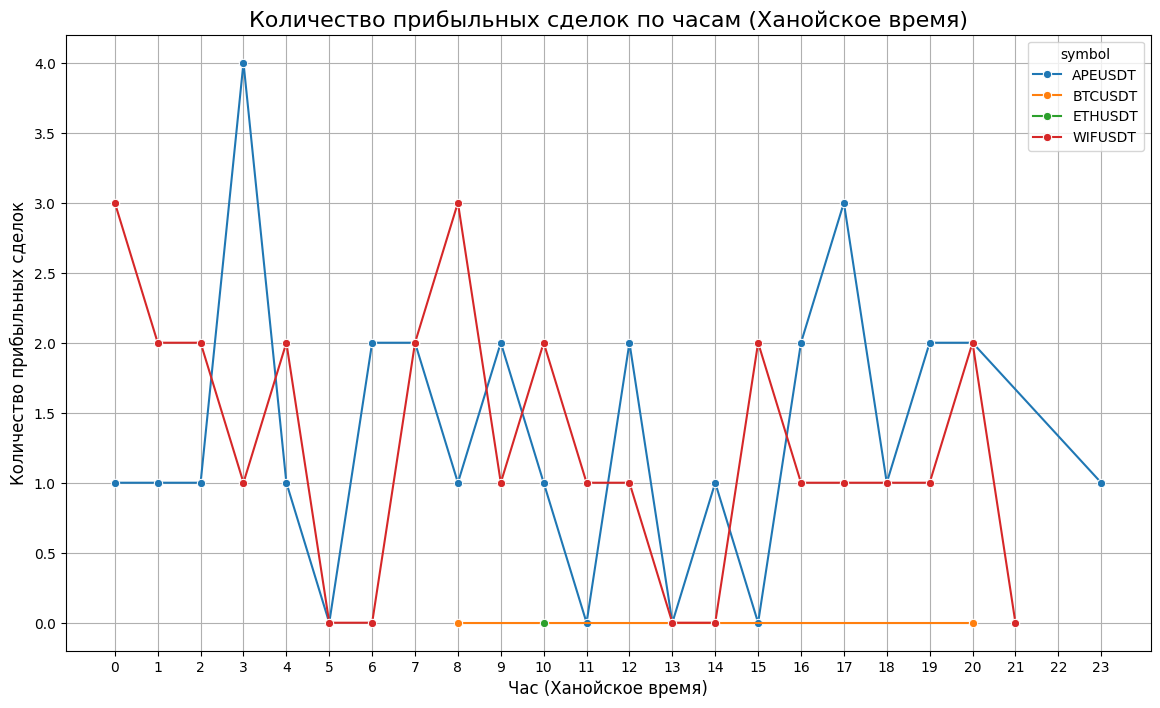

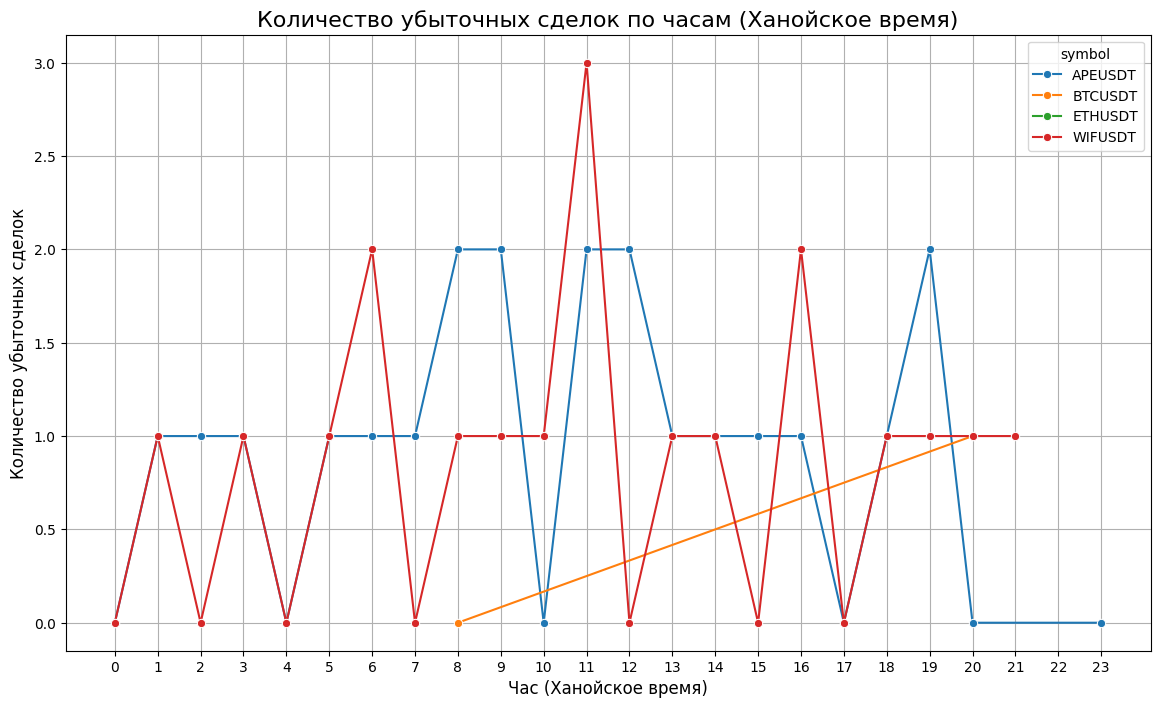

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем размер графика
plt.figure(figsize=(14, 8))

# Создаем график прибыльных сделок по часам
sns.lineplot(
    data=grouped_by_hour,
    x='hour_open_hanoi',
    y='positive_trades',
    hue='symbol',
    marker='o',
    palette='tab10'
)
plt.title('Количество прибыльных сделок по часам (Ханойское время)', fontsize=16)
plt.xlabel('Час (Ханойское время)', fontsize=12)
plt.ylabel('Количество прибыльных сделок', fontsize=12)
plt.xticks(range(0, 24))  # Метки для каждого часа
plt.grid(True)

# Отображаем график
plt.show()

# Теперь аналогичный график для убыточных сделок
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=grouped_by_hour,
    x='hour_open_hanoi',
    y='negative_trades',
    hue='symbol',
    marker='o',
    palette='tab10'
)
plt.title('Количество убыточных сделок по часам (Ханойское время)', fontsize=16)
plt.xlabel('Час (Ханойское время)', fontsize=12)
plt.ylabel('Количество убыточных сделок', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)

# Отображаем график
plt.show()


# Draft

In [ ]:
# Преобразуем время открытия и закрытия в datetime формат
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

# Вычисляем продолжительность сделки в минутах
df['trade_duration'] = (df['close_time'] - df['open_time']).dt.total_seconds() / 60

# Фильтрация закрытых сделок
closed_trades = df[df['status'] == 'CLOSED']

# Разделение на положительные и отрицательные сделки
positive_trades = closed_trades[closed_trades['result'] > 0]
negative_trades = closed_trades[closed_trades['result'] < 0]

# Анализ по каждой монете с подсчётом сделок, прибыли и убытков
coin_analysis = closed_trades.groupby('symbol').agg(
    total_trades=('id', 'count'),
    positive_trades=('result', lambda x: (x > 0).sum()),
    negative_trades=('result', lambda x: (x < 0).sum()),
    profit=('result', lambda x: x[x > 0].sum()),
    loss=('result', lambda x: x[x < 0].sum()),
    # Calculate total_profit using a lambda function that references the 'result' column directly
    total_profit=('result', lambda x: x[x > 0].sum() + x[x < 0].sum()),
    avg_trade_duration_min=('trade_duration', 'mean')
).reset_index()

# Сортировка по количеству сделок
coin_analysis = coin_analysis.sort_values(by='total_trades', ascending=False)

# Вывод результатов
print("Анализ по монетам (отсортирован по количеству сделок):")
display(coin_analysis)
print()
print(f"Всего положительных сделок: {len(positive_trades)}")
print(f"Всего отрицательных сделок: {len(negative_trades)}")


Анализ по монетам (отсортирован по количеству сделок):


,symbol,total_trades,positive_trades,negative_trades,profit,loss,total_profit,avg_trade_duration_min
0,APEUSDT,31,18,13,0.82960,-0.82080,0.00880,6.691500
1,WIFUSDT,30,19,11,0.71609,-0.47311,0.24298,5.407267



Всего положительных сделок: 37
Всего отрицательных сделок: 24


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from matplotlib.dates import DateFormatter
import os

In [ ]:
# Локализуем время в UTC, а затем конвертируем в часовой пояс Ханоя
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')  # Конвертация в datetime формат
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')  # Конвертация в datetime формат

# Локализация времени в UTC (если данные изначально в UTC)
df['open_time'] = df['open_time'].dt.tz_localize('UTC')
df['close_time'] = df['close_time'].dt.tz_localize('UTC')

# Конвертация времени в таймзону Ханоя (UTC+7)
hanoi_tz = pytz.timezone('Asia/Ho_Chi_Minh')
df['open_time_hanoi'] = df['open_time'].dt.tz_convert(hanoi_tz)
df['close_time_hanoi'] = df['close_time'].dt.tz_convert(hanoi_tz)

# Продолжение анализа и построения графиков


TypeError: '<=' not supported between instances of 'Timedelta' and 'int'

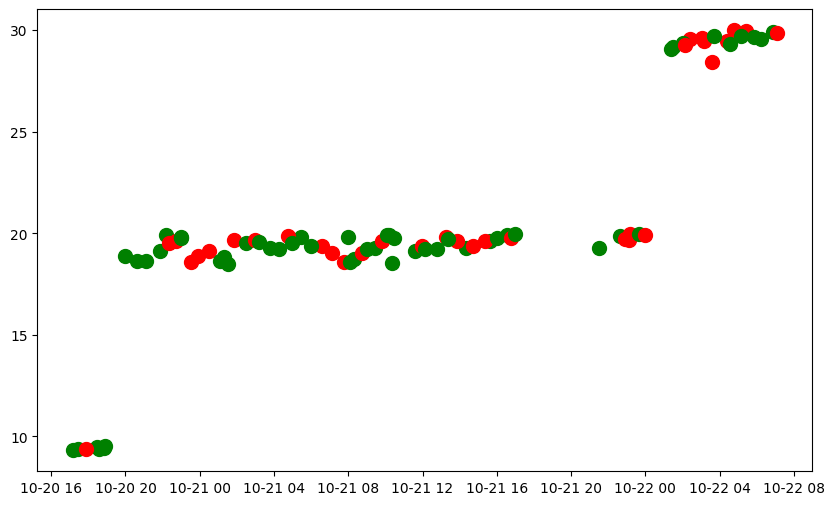

In [ ]:
import pandas as pd
import pytz
import matplotlib.pyplot as plt

# Загружаем данные из CSV
df = pd.read_csv('trades_data_3.csv')

# Конвертируем временные данные в формат datetime с учетом миллисекунд
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms', utc=True)
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms', utc=True)

# Конвертируем время в таймзону Ханоя
hanoi_tz = pytz.timezone('Asia/Ho_Chi_Minh')
df['open_time_hanoi'] = df['open_time'].dt.tz_convert(hanoi_tz)

# Группируем данные по каждой монете
grouped = df.groupby('symbol')

# Строим график для каждой монеты
for symbol, group in grouped:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Убираем синюю линию, строим только точки сделок
    for i, row in group.iterrows():
        color = 'green' if row['result'] > 0 else 'red'
        ax.scatter(row['open_time_hanoi'], row['order_size'], color=color, s=100)

    # Устанавливаем шаг по оси X в 30 минут
    ax.xaxis.set_major_locator(plt.MultipleLocator(pd.Timedelta(minutes=30)))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%H:%M')))

    # Подробная шкала времени
    ax.set_xlabel('Время (Ханой)', fontsize=12)
    ax.set_ylabel('Размер сделки', fontsize=12)
    ax.set_title(f'Сделки по монете: {symbol}', fontsize=14)
    ax.grid(True)

    # Убираем легенду для чистоты графика
    ax.get_legend().remove()

    # Улучшаем отображение временной оси
    fig.autofmt_xdate()

    plt.show()



